In [84]:
%run preamble_notebooks.py
well_spec_250 = pd.read_csv("../Data/Simulations/simu_well_spec_250.csv")
well_spec_500 = pd.read_csv("../Data/Simulations/simu_well_spec_500.csv")
well_spec_1000 = pd.read_csv("../Data/Simulations/simu_well_spec_1000.csv")
well_spec_2000 = pd.read_csv("../Data/Simulations/simu_well_spec_2000.csv")
well_spec_df = pd.concat([well_spec_250, well_spec_500,well_spec_1000, well_spec_2000])
well_spec_df

,Unnamed: 0,sim,model_name,nobs,γ_map,log_marg,Wass_dist,q95,q99,q995,posterior_probability
0,0,0,Exp_Weibull_continuous,250.0,0.000610,-139.321170,125.948038,5.115974,12.562077,16.844684,3.131892e-07
1,1,0,Exp_Lognormal_continuous,250.0,0.004109,-154.610774,210.500536,8.260370,37.291360,64.751513,7.171598e-14
2,2,0,Exp_Log-Logistic_continuous,250.0,0.000772,-150.273620,641.848963,11.049986,98.038644,246.837644,5.485525e-12
3,3,0,Exp_Lomax_continuous,250.0,0.114437,-158.740188,115.671786,4.572849,16.626823,28.308146,1.154076e-15
4,4,0,Exp_Burr_continuous,250.0,0.000252,-139.711549,128.596780,5.460145,18.945729,30.427008,2.119664e-07
...,...,...,...,...,...,...,...,...,...,...,...
10995,105,99,Burr_GPD-Tail_continuous,2000.0,2.299934,-1119.996082,75.535704,4.194413,9.956047,13.661082,1.508840e-04
10996,106,99,Burr_Inverse-Gamma_continuous,2000.0,3.504336,-1120.585400,110.225960,4.087448,10.092420,14.603150,8.369614e-05
10997,107,99,Burr_Inverse-Weibull_continuous,2000.0,3.648401,-1121.080376,121.778827,4.005951,9.677908,14.018791,5.101997e-05
10998,108,99,Burr_Exp_continuous,2000.0,6.776245,-1125.807053,128.514765,4.615433,10.705927,13.406625,4.518250e-07


<AxesSubplot:xlabel='nobs', ylabel='posterior_probability'>

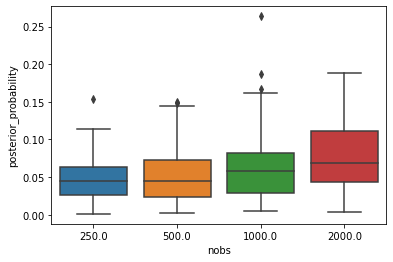

In [86]:
df = well_spec_df[well_spec_df.model_name == "Gamma_Lomax_continuous"]
sns.boxplot(x = "nobs", y = "posterior_probability", data = df)

In [110]:
s = (well_spec_df["sim"] == 5).values & (well_spec_df["nobs"] == 250).values
sorted_df = well_spec_df[s].sort_values("posterior_probability", ascending = False) 
print(sorted_df[:5])
len(sorted_df.iloc[np.cumsum(sorted_df["posterior_probability"].values) < 0.08].model_name.values)
# df = np.cumsum(
#     well_spec_df[s].sort_values("posterior_probability")
#                .values)
# df
# list_model_names = df.groupby(by = ["model_name"]).count()


     Unnamed: 0  sim                     model_name   nobs     γ_map  \
573          23    5   Weibull_Lognormal_continuous  250.0  1.012498   
575          25    5       Weibull_Lomax_continuous  250.0  0.888585   
641          91    5  Log-Logistic_Lomax_continuous  250.0  0.683358   
652         102    5          Burr_Lomax_continuous  250.0  0.541130   
650         100    5      Burr_Lognormal_continuous  250.0  0.551195   

       log_marg  Wass_dist       q95        q99       q995  \
573 -197.032347  29.219006  5.022059  12.528408  17.442284   
575 -197.156740  30.845427  4.797119  13.807112  21.095271   
641 -197.305931  40.599707  4.344849  12.555045  19.167884   
652 -197.339983  42.110408  4.304406  12.381053  18.856162   
650 -197.347347  32.130541  4.536231  11.766303  16.592579   

     posterior_probability  
573               0.057241  
575               0.050545  
641               0.043540  
652               0.042082  
650               0.041774  


1

In [ ]:
df = well_spec_df[well_spec_df["posterior_probability"] > 0.1]
df.groupby(by = ["model_name", "nobs"]).count()